# 시계열 분석

## 1. 목적

* 데이터 시각화 결과 중, 디지털/가전 카테고리에서 PC, PC부품, 모니터, 모니터주변기기, 저장장치 등의 항목은 이전에 20대 여성들의 클릭률이 적었으나 22년 11월-12월에 남성의 클릭량을 몇번 능가했던 것을 기점으로 점차 클릭량이 증가하는 추세가 보였음
* 특히, PC, PC부품, 모니터, 모니터주변기기, 저장장치 등은 여성들의 취미와는 먼, 남성들의 클릭량이 압도적이었던 품목들이었는데 점차 여성들의 클릭량도 증가하고 있다는 점에서 흥미를 느끼게 되어 저 항목을 바탕으로 클릭량 예측을 해보고자 시계열분석을 통해 예측모델을 구현하고자 계획

## 2. 과정

* 1차적으로 사용기기와, 성별, 연령대를 전체로 고정하고 대분류 카테고리인 디지털/가전 카테고리에 대해 시계열분석 진행 -> 유의한 결과가 나오지 않을 경우 성별과 연령대를 선정하고, 중분류 카테고리로 범위를 좁혀 모델 적합 시도
* 분해법과 단위근검정, 자기상관함수 그래프를 통해 데이터의 비정상성을 확인 후, auto_arima 메서드를 사용하여 파이썬이 자동으로 데이터에 대한 최적의 SARIMA모델의 차수를 확인 -> ARIMA모델의 경우, ARIMA(p,d,q)의 형태로 나오는데, 순서대로 이전 관측값을 사용하는 자기회귀모형(AR)의 차수, 차분의 횟수(d), 이전 예측오차를 사용하는 이동평균모형(MA)의 차수가 합쳐진 것.
* 여기에 더해서 일정 주기마다 반복되는 패턴이 보이는 계절성분을 고려하고자 개선모델인 SARIMA사용 -> SARIMA의 표기방식은 ARIMA모델에 추가적으로 계절적 AR모델의 차수, 계절적 차분의 횟수, 계절적 MA모델의 차수, 계절성 주기를 나타내는 SARIMA(p, d, q)(P, D, Q, S)의 형태이다.
* 모델 적합 후 train, test 데이터셋을 나누지 않고 모델 예측 진행, 이때 23년 1월1일부터 구간을 지정하여 모델 예측 시행
* 최적 모델의 정상성 검증은 잔차분석과 잔차의 단위근 검정을 통해 확인. 데이터셋을 분할하지 않아 교차검증은 최적모델을 다른 카데고리 및 다른 데이터에 적합시켜 결과를 확인하는 것으로 대체함


## 3. 분석 결과

### 대분류 카테고리(디지털/가전)

* 디지털/가전의 시계열 최적모델

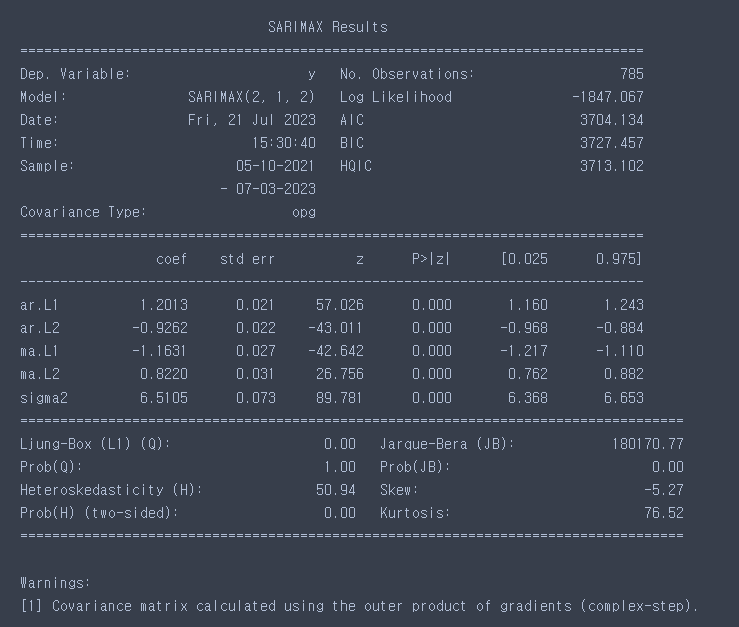

* SARIMA 시계열모델 구간예측 결과

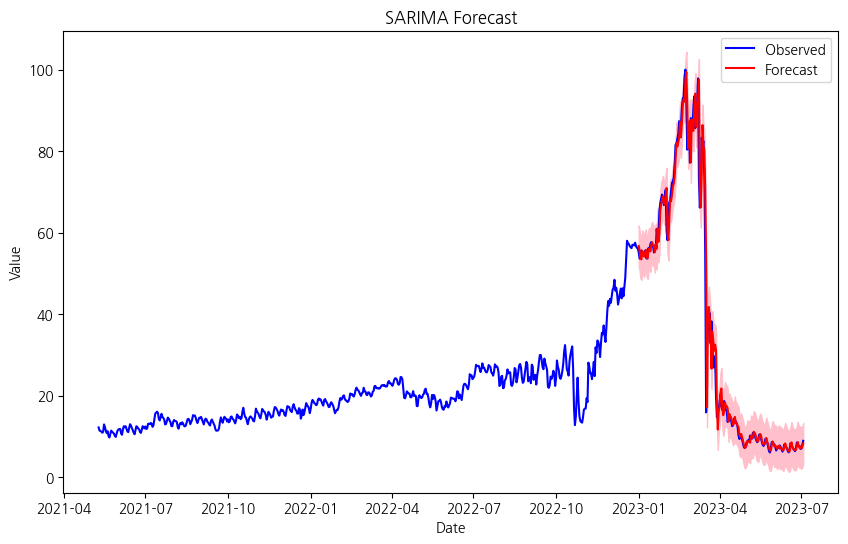

* 23년 1월1일부터 7월3일까지 확대한 그래프

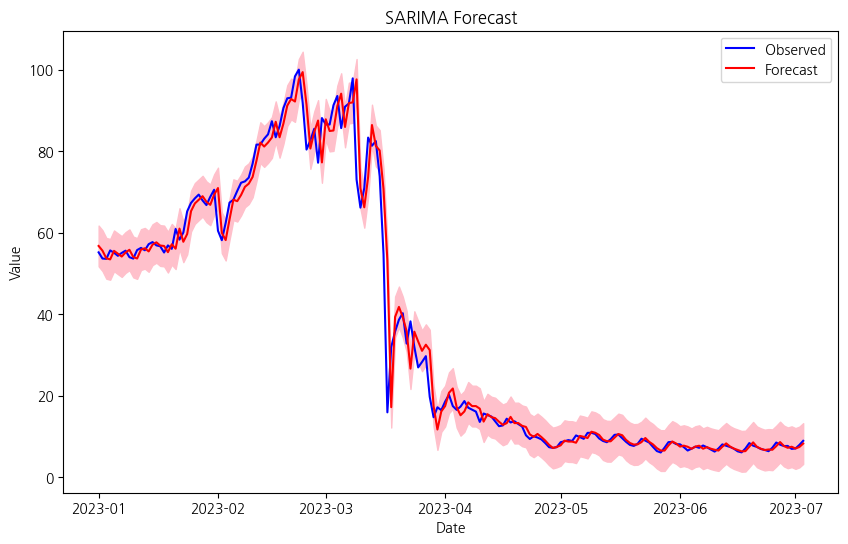

* 모델의 MSE, RMSE 도출

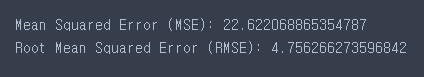

* 잔차분석

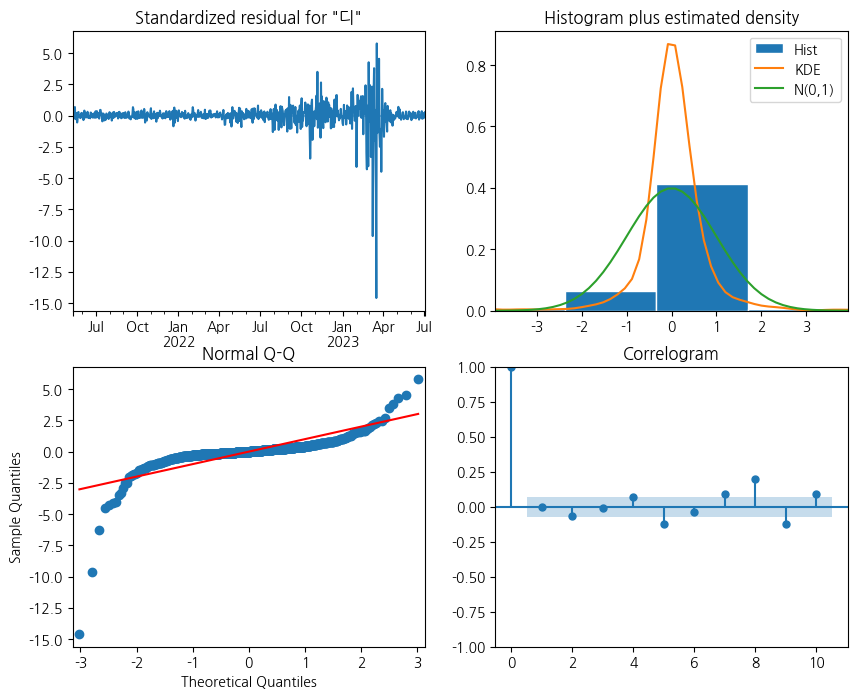

* 잔차에 대한 단위근 검정

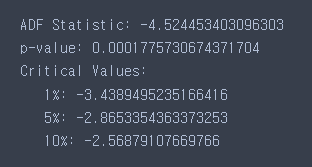

### 대분류 카테고리 분석 결과
* **잔차분석 그래프** <br>
-> (1,1)의 표준화 잔차 그래프: 잔차들의 평균값이 대체적으로 0 주위에 분포되어 있음, 특정 기간에서 분산이 튀긴 하나 전반적으로 일정한 분산을 가진다고 볼 수 있음
<br>
-> (2,2)의 자기상관그래프: ACF그래프가 빠른 시차내에 0에 수렴하는 것을 보임
* **잔차 단위근 검정** <br>
-> 유의수준 0.05에서 p-value값이 유의수준보다 작으므로 귀무가설 기각. 즉, SARIMA(2, 1, 2)모델은 정상성을 가지는 모델임을 확인했다.
* 대분류에 대해 시계열모델을 적용했을 시, 데이터셋을 분할하지 않고 진행했으므로 실제 클릭량과 예측값의 편차가 거의 비슷했으며, MSE, RMSE역시 크지 않아 모델의 과적합이 우려되었음
* 또한 미래예측을 시도했을 때, 예측에 대한 신뢰구간이 너무 포괄적이어서 결과활용에 있어 어려움이 존재
* 따라서 추가적으로 중분류 카테고리로 범위를 좁혀 세부 분석을 실시함

### 디지털/가전 내 중분류 카테고리

* 세부 데이터분석 시각화 시에 여성들에게서 특정 기간에 유의성이 보였었던 PC, PC부품, 모니터, 모니터 주변기기, 저장장치 등을 중점적으로 비교
* 기준이 되는 모델은 임의로 PC부품으로 선정

### 20대 여성의 PC부품 카테고리에 대한 클릭량 최적의 시계열 모델예측

* PC부품에 대한 최적의 SARIMA모델

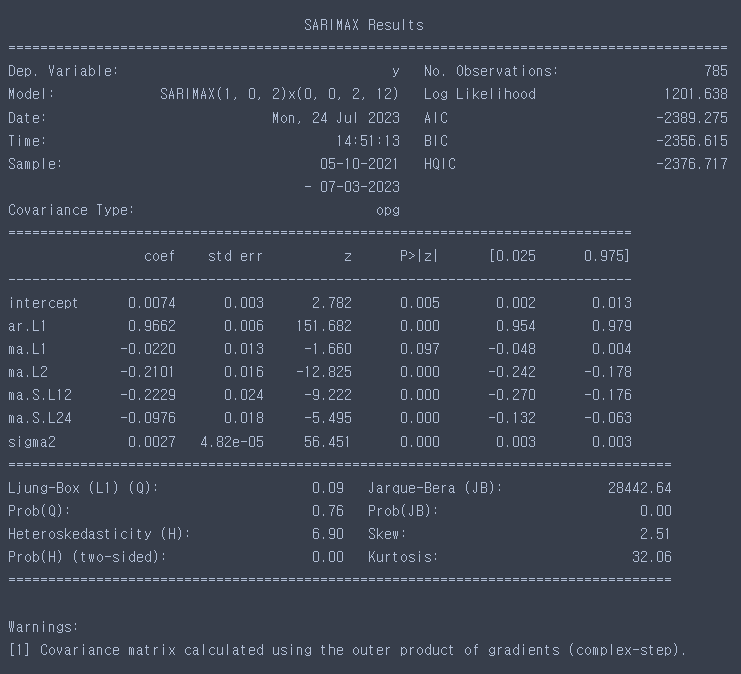

* SARIMA 시계열모델 구간예측 결과

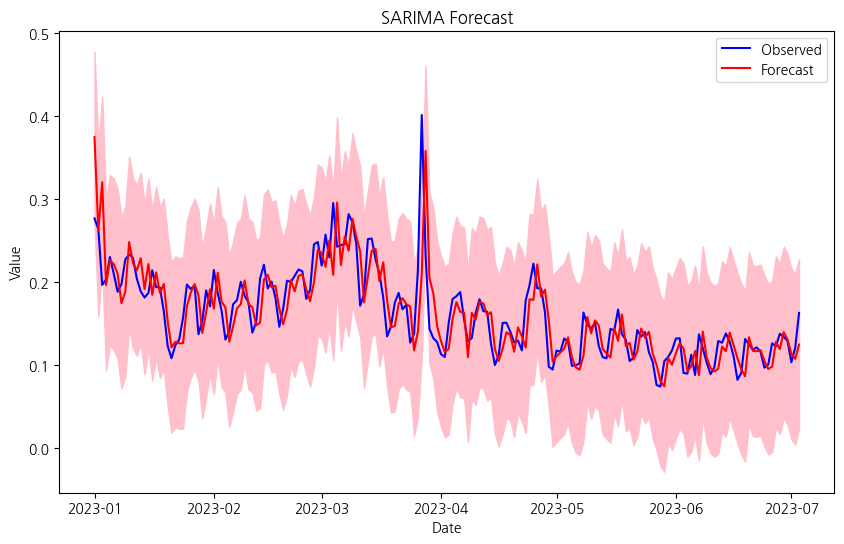

* MSE, RMSE 도출

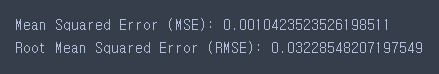

* 잔차분석

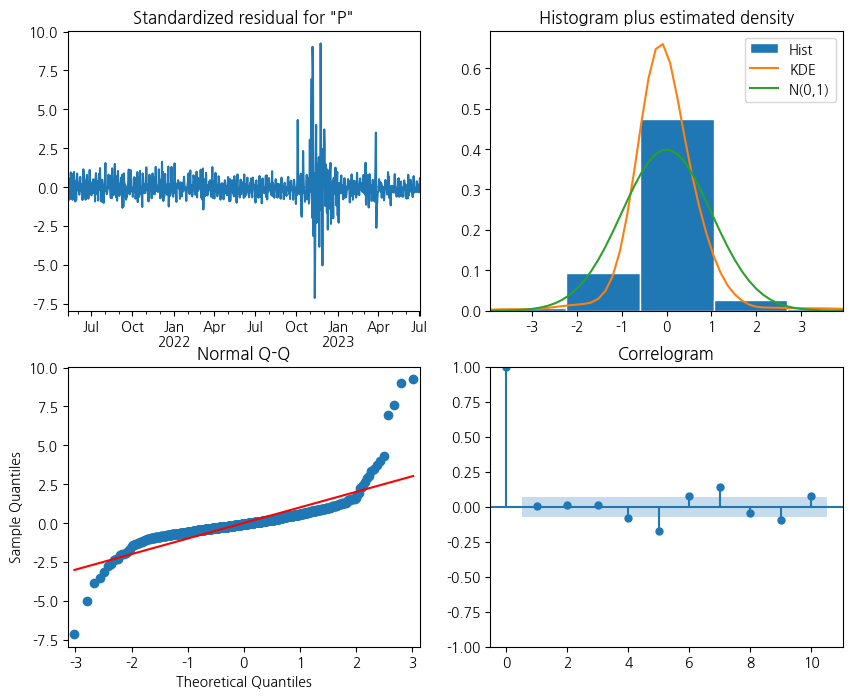

* 잔차에 대한 단위근 검정

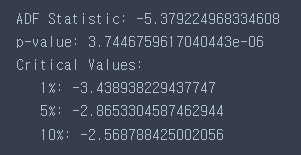

* (추가) train, test데이터셋을 분할한 경우

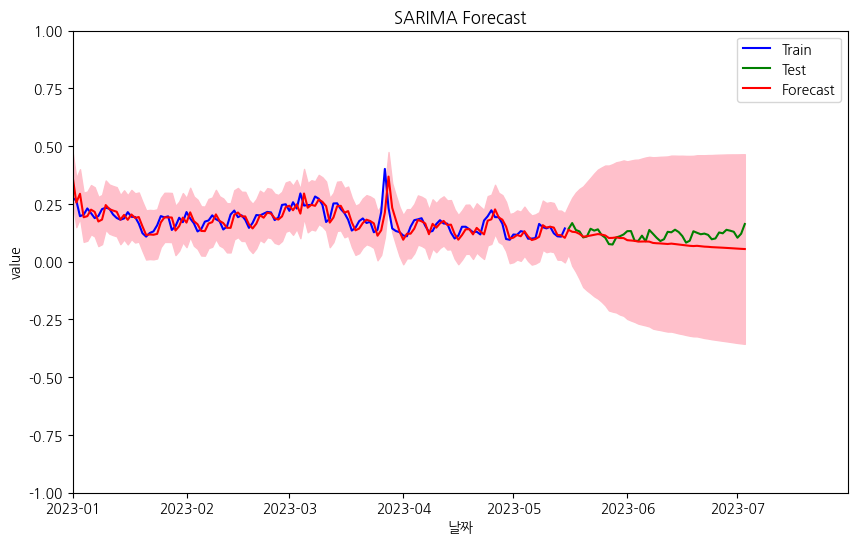

### PC부품 카테고리에 대한 분석 결과
* **잔차분석 그래프**<br>
-> (1,1)의 표준화 잔차 그래프: 잔차들의 평균값이 대체적으로 0 주위에 분포되어 있음, 특정 기간에서 분산이 튀긴 하나 전반적으로 일정한 분산을 가진다고 볼 수 있음<br>
-> (2,2)의 자기상관그래프: ACF그래프가 빠른 시차내에 0에 수렴하는 것을 보임
* **잔차 단위근 검정**
-> 유의수준 0.05에서 p-value값이 유의수준보다 작으므로 귀무가설 기각. 즉, SARIMA(1, 0, 2)(0, 0, 2, 12)모델은 정상성을 가지는 모델임을 확인했다.
* 범위를 좁혀서 그런지 로그변환의 과정이 필요 없이 전체 대분류를 진행했을때 보다 그래프의 튀는 폭이 많이 줄었음, 또한 auto_arima를 통해 최적모델을 찾았을떄 대부분 차분이 필요가 없는 형태임
* 따라서, 비교를 해보고자 동일데이터의 다른 카테고리, 다른 데이터의 성별, 연령대의 PC부품, 모니터로 확장시켜 
모델을 검증하고자 했음

###  (동일 데이터) SARIMA(1,0,2)(0,0,2,12)모델에 PC 카테고리 적용

* SARIMA 시계열모델 구간예측 결과

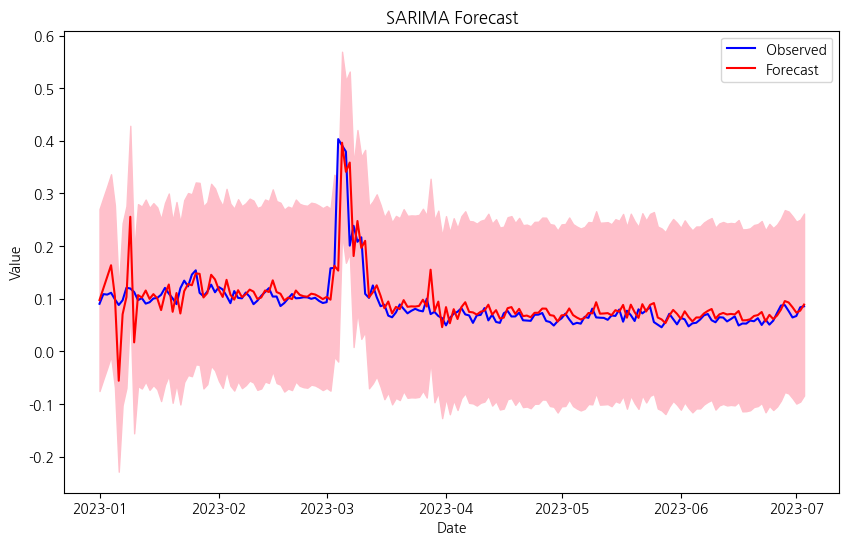

* MSE, RMSE 도출

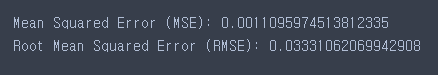

###  (동일 데이터) SARIMA(1,0,2)(0,0,2,12)모델에 모니터 카테고리 적용

* SARIMA 시계열모델 구간예측 결과

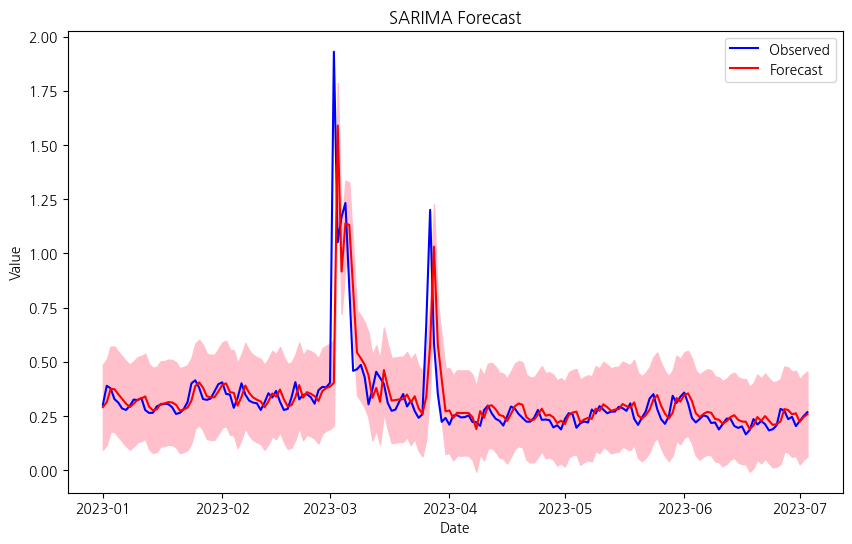

* MSE, RMSE 도출

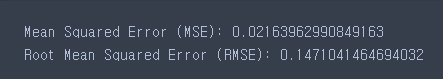

###  (동일 데이터) SARIMA(1,0,2)(0,0,2,12)모델에 모니터주변기기 카테고리 적용

* SARIMA 시계열모델 구간예측 결과

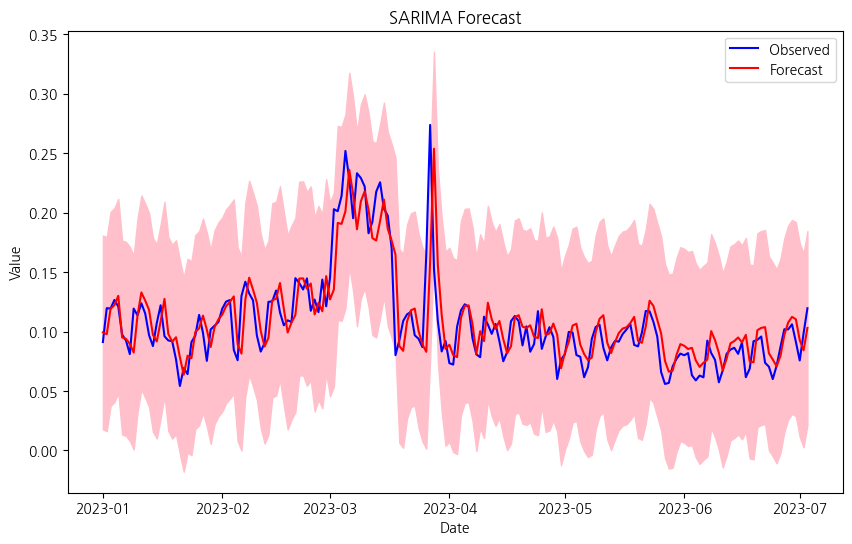

* MSE, RMSE 도출

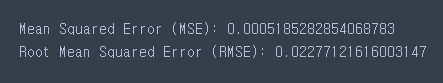

###  (동일 데이터) SARIMA(1,0,2)(0,0,2,12)모델에 저장장치 카테고리 적용

* SARIMA 시계열모델 구간예측 결과

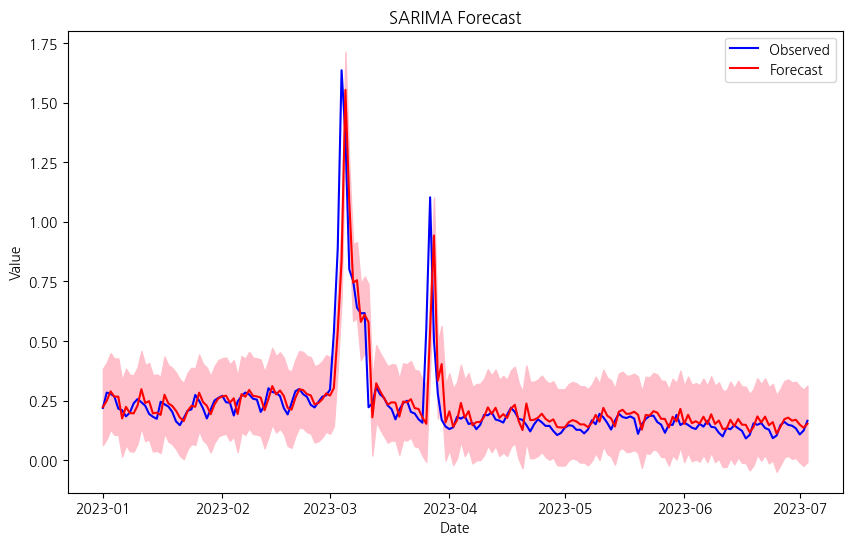

* MSE, RMSE 도출

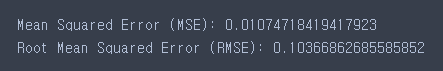

### (다른 데이터) 여성 전체 연령대의 데이터를 불러와 모델에 적용 및 비교

* SARIMA 시계열모델 구간예측 결과

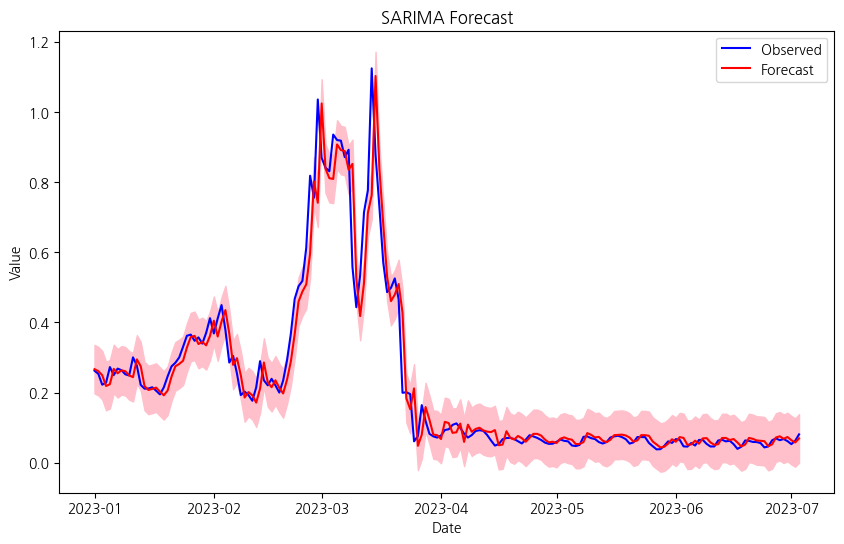

* MSE, RMSE 도출

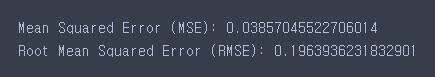

### (다른 데이터) 전체성별_PC부품에 대해 적용

* SARIMA 시계열모델 구간예측 결과

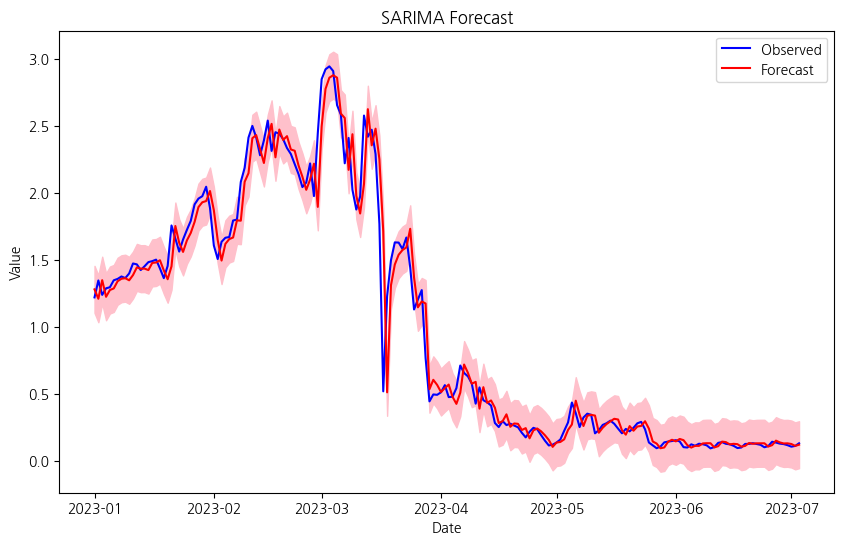

* MSE, RMSE 도출

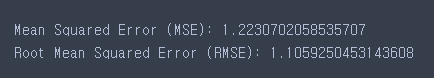

## 4. 결론 및 의의

### 결과
* 동일한 모델을 카테고리만 변경해 주었을 때 카테고리마다 그래프가 상이하게 나오며, RMSE, MSE역시 다르게 나오는 것으로 보아 모델 자체에 대해서는 적용 가능한 모델이라 판단. 마찬가지로 잔차분석과 단위근 검정을 통해서도 해당 모델에 대한 정상성 확인

* 동일 카테고리에 대해 연령대를 20대에서 전체 연령대로 또는 성별을 전체로 확장시켜 적용했을 경우 각각에 대하여 실제값과 예측값에 어느정도 차이가 있지만 오차가 크지 않은 것으로 보아 데이터 추가 후 보완을 하게 된다면 보다 좋은 모델이 될 수 있다고 생각됨 → 미래 예측에 대한 활용 가능성 ⬆️

### 한계점
* 근본적인 문제점, 데이터의 수가 많지 않다보니 충분한 계절성분을 확인하는데 어려움이 많았다. 또한 그에 따른 train, test데이터셋 분할을 통해 예측모델에 대한 정확한 검증을 하기에는 무리가 있었음

* 시계열모델을 활용하여 미래 예측을 하고자 할 경우도 마찬가지로, 지금보다 더 많은 년수에 해당되는 데이터와 계절 성분, 또한 계절성에 영향을 주는 다양한 요인(사회, 경제, 정치 등 다양한 분야)에 대한 추가적인 데이터 확보를 통해 모델에 적용시킨 후, 데이터셋을 분할하고 예측의 신뢰도 및 정확도를 올려야 하는 상당한 노력이 필요할 것으로 예상된다.

* 따라서 미래예측은 이번 프로젝트 과정에서 제한된 시간내에 자원적으로 구현하기는 어렵다 판단되어 제외하게 되었다. 추후 충분한 양의 계절성분이 포함된 데이터가 축적된다면, 모델 수정을 통해 다른 카테고리로 확장시키는 등의 더 좋은 모델로 개선해 나갈 수 있다고 생각됨


### 의의 및 느낀점
* 개인적으로 이전에 시계열분석을 진행했을때는 단순히 데이터의 성분을 파악하고 모델적용만 하는데에 그쳤었는데, 프로젝트를 통해 데이터에서도 보고자 하는 관점에 대해 세부적으로 파고들거나, 예측의 결과 활용성, 활용 및 보완을 위한 추가적인 데이터요소 수집 필요성 등을 경험하게 된 계기가 되었다.
* 다음에 시계열모델을 다시 다루게 된다면 느꼈던 한계점들을 생각하며 모델을 구축하게 된다면 보다 좋은 모델을 만들 수 있을것이다. 